#**09-3 LSTM과 GRU**

# LSTM 구조
> LSTM은 Long Short-Term Memory의 약자로 단기 기억을 오래 기억하기 위해 고안됨
- LSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러 개 가지고 있음
 - 이런 계산 결과는 다음 타임스텝에 재사용 됨

> 은닉 상태는 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듬
 - 이때 기본 순환 층과는 달리 시그모이드 함수를 사용함
 - 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듬

<img src= "https://drive.google.com/uc?export=view&id=1-oJg5EwI4r2wZIJv523982A78zVV7Ui5" width=700 height=500>

> 이 그림에는 은닉 상태를 계산할 때 사용하는 가중치 Wx와 Wh를 통틀어 Wo라고 표현함

> 파란색 원은 tanh 함수를 나타내고 주황색  원은 시그모이드 함수를 나타냄

> x는 곱셈을 나타냄


> LSTM에는 순환되는 상태가 2개임
- 은닉 상태 말고 셀 상태(cell state)라고 부르는 값이 또 존재함
- 은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값임

> 다음 그림에서 초록색으로 순환되는 셀 상태가 표시되어 있음

<img src= "https://drive.google.com/uc?export=view&id=1vti4P7_0qp5EThRgOldYCMsg7qUU3en2" width=700 height=500>

> 셀 상태를 은닉 상태 h와 구분하여 c로 표시함

> 셀 상태를 계산하는 과정
1. 입력과 은닉 상태를 또 다른 가중치 Wf에 곱한 다음 시그모이드 함수를 통과시킴
2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듬
- 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여함

> 중요한 점은 입력 상태와 은닉 상태에 곱해지는 가중치 Wo와 Wf가 다르다는 점
- 이 두 작은 셀은 각기 다른 기능을 위해 훈련됨



> 여기에 2개의 작은 셀이 더 추가되어 셀 상태를 만드는 데 기여함

<img src= "https://drive.google.com/uc?export=view&id=15BevXqeCl0-7z_S52oNMyX6n_BwKE1cO" width=700 height=500>

> 이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음, 하나는 시그모이드 함수를 통과시키고 다른 하나는 tanh 함수를 통과시킴

> 그 다음 두 결과를 곱한 후 이전 셀 상태와 더함
- 이 결과가 최정적인 다음 셀 상태가 됨

> 다음 그림처럼 세군데의 곱셈을 왼쪽부터 차례대로 삭제 게이트, 입력 게이트, 출력 게이트라고 부름

<img src= "https://drive.google.com/uc?export=view&id=1fXp6eDj_OXR1r2cwZEfyOQ5OAgR5eO-N" width=700 height=500>

> 삭제 게이트는 셀 상태에 있는 정보를 제거하는 역할을 함

> 입력 게이트는 새로운 정보를 셀 상태에 추가함

> 출력 게이트를 통해 이 셀 상태가 다음 은닉 상태로 출력됨

> 케라스에는 LSTM 클래스가 준비됨

# LSTM 신경망 훈련하기



In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
# IMDB 리뷰 데이터를 로드하고 훈련 세트와 검증 세트로 나누기
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
# 케라스의 pad_sequences() 함수로 각 샘플의 길이를 100에 맞추고 부족할 때는 패딩 추가
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
# LSTM 셀을 사용한 순환층 생성, SimpleRNN 클래스를 LSTM 클래스로 바꾸기만 하면 됨
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
# 모델 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> SimpleRNN 클래스의 모델 파라미터 개수는 200개 였지만, LSTM 셀에는 작은 셀이 4개 있으므로 정확히 4배가 늘어 800개가 됨

In [8]:
# 모델 컴파일, 훈련 (배치 크기 64, 에포크 횟수 100, 체크포인트와 조기종료 코드도 동일)

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6927 - accuracy: 0.5277 - val_loss: 0.6924 - val_accuracy: 0.5368
Epoch 2/100
  5/313 [..............................] - ETA: 9s - loss: 0.6925 - accuracy: 0.5406 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 7s 24ms/step - loss: 0.6916 - accuracy: 0.5677 - val_loss: 0.6911 - val_accuracy: 0.5668
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6896 - accuracy: 0.6011 - val_loss: 0.6883 - val_accuracy: 0.6062
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6842 - accuracy: 0.6363 - val_loss: 0.6792 - val_accuracy: 0.6618
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6589 - accuracy: 0.6827 - val_loss: 0.6277 - val_accuracy: 0.7076
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6084 - accuracy: 0.7135 - val_loss: 0.5964 - val_accuracy: 0.7114
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5834 - accuracy: 0.7280 - val_loss: 0.5746 - val_accuracy: 0.7330
Epoch 8/100
313/313 [==============================] - 16s 50ms/step - loss: 0.5617 - accuracy: 0.7452 - val_loss: 0.5553 - val_accuracy: 0.7452
E

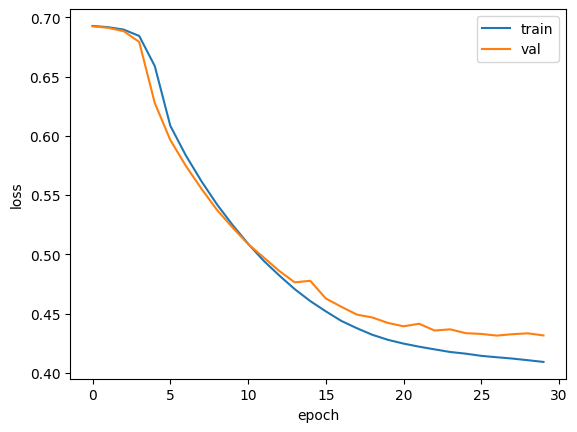

In [9]:
# 훈련 손실과 검증 손실 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> 그래프를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행한 것으로 보임

# 순환층에 드롭아웃 적용하기

> 순환층은 자체적으로 드롭아웃 기능을 제공함
- SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음

> dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용
- 하지만 기술적인 문제로 인해 recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련할 수 없음, 이 때문에 모델의 훈련 속도가 크게 느려짐
- 따라서 여기에서는 dropout만을 사용

In [12]:
# 전체적인 모델 구조는 이전과 동일함 LSTM 클래스에 dropout 매개변수를 0.3으로 지정하여 30% 입력을 드롭아웃함
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 27ms/step - loss: 0.6924 - accuracy: 0.5317 - val_loss: 0.6917 - val_accuracy: 0.5696
Epoch 2/100
  7/313 [..............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5335

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 7s 23ms/step - loss: 0.6907 - accuracy: 0.5788 - val_loss: 0.6897 - val_accuracy: 0.5984
Epoch 3/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6879 - accuracy: 0.6057 - val_loss: 0.6861 - val_accuracy: 0.6232
Epoch 4/100
313/313 [==============================] - 10s 30ms/step - loss: 0.6826 - accuracy: 0.6251 - val_loss: 0.6787 - val_accuracy: 0.6392
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6674 - accuracy: 0.6511 - val_loss: 0.6529 - val_accuracy: 0.6630
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6258 - accuracy: 0.6999 - val_loss: 0.6108 - val_accuracy: 0.7108
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5967 - accuracy: 0.7250 - val_loss: 0.5894 - val_accuracy: 0.7274
Epoch 8/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5771 - accuracy: 0.7402 - val_loss: 0.5723 - val_accuracy: 0.7396
Ep

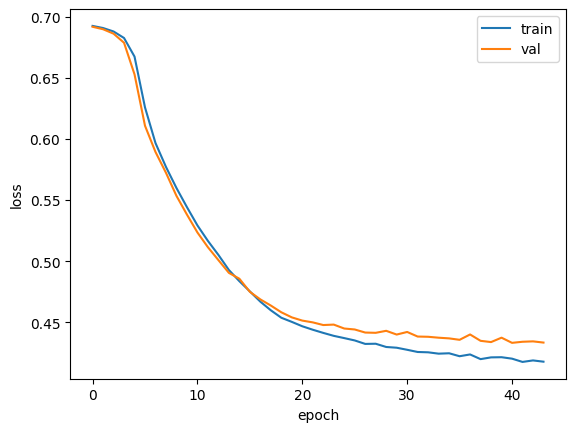

In [14]:
# 훈련손실 검증손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> 훈련 손실과 검증 손실 간의 차이가 좁혀진 것을 확인 할 수 있음

# 2개의 층을 연결하기

> 순환층을 연결할 때는 한 가지 주의할 점이 있음
- 순환층의 은닉 상태는 샘프의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달함
- 하지만 순환층을 쌓게 되면 모든 순환층에 대한 순차 데이터가 필요함
- 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함
- 오직 마지막 순환층만 마지막 타임스텝에 대한 은닉상태를 출력해야 함


<img src= "https://drive.google.com/uc?export=view&id=1cIofoiWxRM36ICmcSgIWx_N6wQKHOYg4" width=700 height=500>

> 케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 출려하면 됨

In [19]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

> 2개의 LSTM 층을 쌓았고 모두 드롭아웃을 0.3으로 지정함 그리고 첫 번째 LSTM 클래스에서는 return_sequences 매개변수를 True로 지정

In [20]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_6 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 첫 번째 LSTM 층이 모든 타임스텝 (100개)의 은닉 상태를 출력하기 때문에 출력 크기가 (None, 100, 8)로 표시됨

> 반면 두 번째 LSTM 층의 출력 크기는 마지막 타임스텝의 은닉 상태만 출력하기 때문에 (None,8)임



In [21]:
# 이 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 55ms/step - loss: 0.6931 - accuracy: 0.5026 - val_loss: 0.6931 - val_accuracy: 0.4916
Epoch 2/100
  2/313 [..............................] - ETA: 16s - loss: 0.6931 - accuracy: 0.5078

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 18s 59ms/step - loss: 0.6928 - accuracy: 0.5199 - val_loss: 0.6928 - val_accuracy: 0.4954
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6921 - accuracy: 0.5551 - val_loss: 0.6916 - val_accuracy: 0.5218
Epoch 4/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6884 - accuracy: 0.5953 - val_loss: 0.6834 - val_accuracy: 0.6372
Epoch 5/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6613 - accuracy: 0.6654 - val_loss: 0.6350 - val_accuracy: 0.6878
Epoch 6/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6184 - accuracy: 0.6927 - val_loss: 0.6071 - val_accuracy: 0.7004
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.5940 - accuracy: 0.7087 - val_loss: 0.5837 - val_accuracy: 0.7156
Epoch 8/100
313/313 [==============================] - 15s 46ms/step - loss: 0.5700 - accuracy: 0.7269 - val_loss: 0.5583 - val_accuracy: 0.72

> 일반적으로 순환층을 쌓으면 성능이 높아짐, 이 예에서는 그리 큰 효과 X

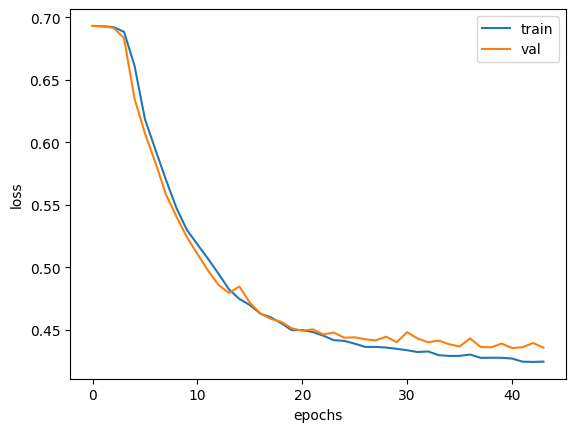

In [22]:
# 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


> 과대적합을 제어 하면서 손실을 최대한 낮춘 것이 확인됨

# GRU 구조

> GRU는 Grated Recurrent Unit의 약자로 LSTM을 간소화한 버전으로 생각할 수 있음
- 이 셀은 LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있음

> GRU 셀의 그림

<img src= "https://drive.google.com/uc?export=view&id=1grsFk4a1nYYFVQDlpmQy4fATDe9uDPOQ" width=700 height=500>



> GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어 있음
- 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수 사용
- 여기에서도 은닉 상태와 입력에 곱해지는 가중치를 합쳐서 나타냄



> 맨 왼쪽에서 Wz를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행함
- 이와 똑같은 출력을 1에서 뺀 다음에 가장 오른쪽 Wg를 사용하는 셀의 출력에 곱함
 - 이는 입력 되는 정보를 제어하는 역할 수행
- 가운데 Wr을 사용하는 셀에서 출력된 값은 Wg 셀이 사용할 은닉 상태의 정보를 제어함

> GRU 셀은 LSTM 보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않는 좋은 성능을 내는 것으로 알려짐

# GRU 신경망 훈련하기

In [23]:
# GRU 셀으 사용한 순환 신경망 만들기
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> GRU 층의 모델 파라미터 수 계산
- GRU 층에는 3개의 작은 셀 존재
 - 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편 존재
- 입력에 곱하는 가중치는 16 x 8 = 128개
- 은닉 상태에 곱하는 가중치는 8 x8 = 64개
- 절편은 뉴런마다 하나씩이므로 8개
- 모두 더하면 128 + 64 + 8 = 200개임
- 이런 작은 셀이 3개이므로 모두 600개의 모델 파라미터가 필요
 - 그러나 summary() 메서드의 출력은 624개?

> 사실 텐서플로에 기본적으로 구현된 GRU 셀의 계산은 앞의 그림과 조금 다름

<img src= "https://drive.google.com/uc?export=view&id=1oJv4GKOBwsQhDPi25vKhuTqxezcheMr3" width=700 height=500>

> 달라지는 부분은 G로 표시된 작은 셀에 들어가는 입력 부분
- 이전에는 가운데 셀의 출력과 은닉 상태가 곱해진 후 G 셀에 입력됨
- 하지만 바뀐 그림에서는 은닉 상태가 먼저 가중치와 곱해진 다음 가운데 셀의 출력과 곱해짐
 - 그래서 이전에는 입력과 은닉 상태에 곱해지는 가중치를 Wg로 별도로 표기했는데 이 그림에서는 Wx와 Wh로 나눔

> 이렇게 나누어 계산하면 은닉 상태에 곱해지는 가중치 외에 절편이 별도로 필요해짐

> 따라서 작은 셀마다 하나씩 절편이 추가되고 8개의 뉴런이 있으므로 총 24개의 모델 파라미터가 더해짐
- 따라서 GRU 층의 총 모델 파라미터 개수는 624개가 됨

> 텐서플로가 이런 계산 방식을 사용하는 이유는 GRU를 잘 활용하기 위해서
- 하지만 대부분 GRU 셀을 소개할 때는 전자의 그림을 사용

> 널리 통용되는 이론과 구현이 차이 나는 경우가 종종 있음

In [24]:
# GRU 셀을 사용한 순환 신경망 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 28ms/step - loss: 0.6924 - accuracy: 0.5247 - val_loss: 0.6914 - val_accuracy: 0.5482
Epoch 2/100
  7/313 [..............................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5714

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 29ms/step - loss: 0.6899 - accuracy: 0.5713 - val_loss: 0.6887 - val_accuracy: 0.5776
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6860 - accuracy: 0.5950 - val_loss: 0.6841 - val_accuracy: 0.5948
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6793 - accuracy: 0.6156 - val_loss: 0.6758 - val_accuracy: 0.6196
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6674 - accuracy: 0.6374 - val_loss: 0.6611 - val_accuracy: 0.6382
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6459 - accuracy: 0.6600 - val_loss: 0.6330 - val_accuracy: 0.6678
Epoch 7/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6004 - accuracy: 0.6945 - val_loss: 0.5686 - val_accuracy: 0.7156
Epoch 8/100
313/313 [==============================] - 8s 27ms/step - loss: 0.5324 - accuracy: 0.7390 - val_loss: 0.5194 - val_accuracy: 0.7482
Ep

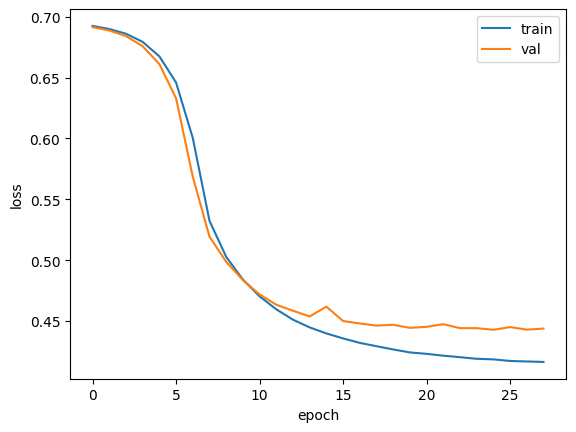

In [25]:
# 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> 드롭아웃을 사용하지 않아서 이전보다 훈련손실과 검증 손실 사이에 차이가 있지만 훈련과정이 잘 수렴되고 있는 것을 확인할 수 있음

# LSTM과 GRU 셀로 훈련

> 가장 좋았던 2개의 순환층을 쌓은 모델을 다시 로드하여 테스트 세트에 대한 성능확인
1. 테스트 세트를 훈련 세트와 동일한 방식으로 변환
2. load_model() 함수를 사용해 best-2rnn-model.h5 파일을 읽고 evalute() 메서드로 테스트 세트에서 성능 계산

In [28]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 9s 10ms/step - loss: 0.4311 - accuracy: 0.7972


[0.43110063672065735, 0.7972000241279602]